# **CrimeCast: Forecasting Crime Categories**

# Overview

This dataset offers a comprehensive snapshot of criminal activities within the city. It encompasses various aspects of each incident, including date, time, location, victim demographics, and more.

# Aim

By leveraging machine learning techniques, participants can analyze this rich dataset to predict crime categories, enhance law enforcement strategies, and bolster public safety measures.

# 1. Importing Necessary Libraries

In [1]:
# visualization & EDA
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# models library
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# 2. Data Loading

**Data Files:**

The dataset consists of the following files:

* train.csv: The training set, inclusive of the target variable 'crime_category' and relevant feature attributes.

* test.csv: The test set, containing similar feature attributes but excluding the target variable 'crime_category', as it is the variable to be predicted.

* sample_submission.csv: A sample submission file provided in the correct format for competition submissions.

In [3]:
sample = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [4]:
train.shape

(20000, 22)

In [5]:
test.shape

(5000, 21)

# 3. Data Visualization

**Columns Description:**

* Cross_Street: Cross street of the rounded address.
* Latitude: Latitude coordinates of the crime incident.
* Longitude: Longitude coordinates of the crime incident.
* Date_Reported: Date the incident was reported.
* Date_Occurred: Date the incident occurred.
* Time_Occurred: Time the incident occurred in 24-hour military time.
* Area_ID: LAPD's Geographic Area number.
* Area_Name: Name designation of the LAPD Geographic Area.
* Reporting_District_no: Reporting district number.
* Part 1-2: Crime classification.
* Modus_Operandi: Activities associated with the suspect.
* Victim_Age: Age of the victim.
* Victim_Sex: Gender of the victim.
* Victim_Descent: Descent code of the victim.
* Premise_Code: Premise code indicating the location of the crime.
* Premise_Description: Description of the premise code.
* Weapon_Used_Code: Weapon code indicating the type of weapon used.
* Weapon_Description: Description of the weapon code.
* Status: Status of the case.
* Status_Description: Description of the status code.
* Crime_Category: The category of the crime (Target Variable)


In [6]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [7]:
test.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [8]:
train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [9]:
test.isnull().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

* Cross_Street, Modus_Operandi, Victim_Sex, Victim_Descent, Weapon_Used_Code, Premise_Description, Weapon_Description - has null values

In [10]:
# check for null values
print(f"Count of null values in 'train_csv': {train.isna().sum().sum()} values")
print(f"Count of null values in 'test_csv': {test.isna().sum().sum()} values")

Count of null values in 'train_csv': 49876 values
Count of null values in 'test_csv': 12467 values


In [11]:
train['Victim_Sex'].unique()

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [12]:
train['Crime_Category'].unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

Crime categories observed are as follows:

* 'Property Crimes', 'Violent Crimes', 'Other Crimes','Crimes against Public Order', 'Fraud and White-Collar Crimes', 'Crimes against Persons'

# 4. **EDA**

# Univariate Analysis

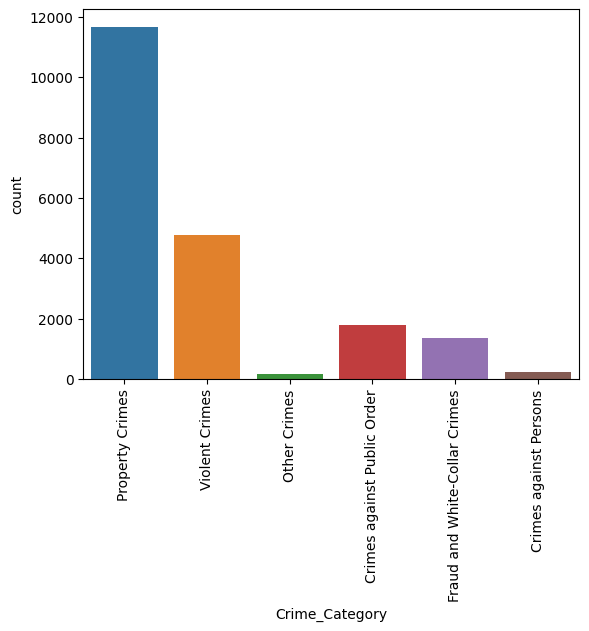

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of categorical variables
sns.countplot(data=train, x='Crime_Category')
plt.xticks(rotation=90)
plt.show()

**Observation**

- Different type of Crime_Category and their distribution is shown here

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


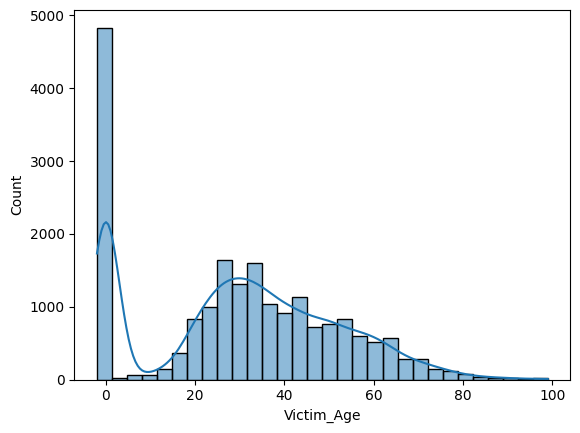

In [14]:
# Plot distribution of numerical variables
sns.histplot(train['Victim_Age'], bins=30, kde=True)
plt.show()

**Observation:**

- Victim age shows a right-skewed distribution, with the majority being in their 20s to 40s.

**Observation**

 - Age information is not right, we need to do some filtering for it

Text(0, 0.5, 'Count')

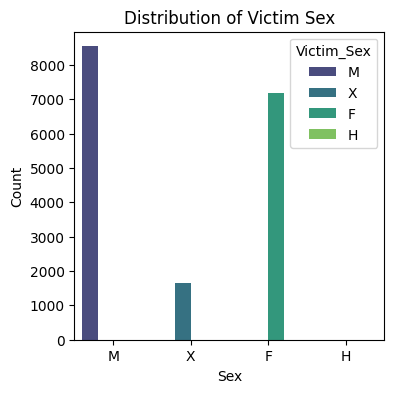

In [15]:
# distribution of victim sex
plt.figure(figsize=(4, 4))
sns.countplot(x='Victim_Sex', data=train, palette='viridis', hue = "Victim_Sex")
plt.title('Distribution of Victim Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

**Observation:**

 - More male victims are reported compared to female victims.

Text(0, 0.5, 'Descent')

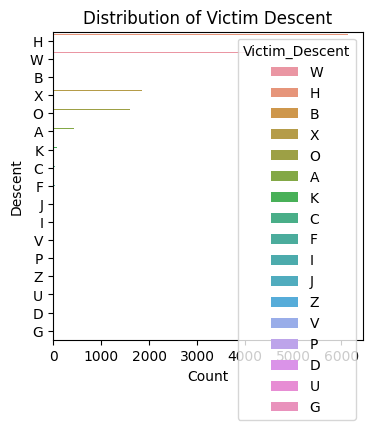

In [16]:
# distribution of victim descent
plt.figure(figsize=(4, 4))
sns.countplot(y='Victim_Descent', data=train, order=train['Victim_Descent'].value_counts().index, hue = "Victim_Descent")
plt.title('Distribution of Victim Descent')
plt.xlabel('Count')
plt.ylabel('Descent')

**Observation**

- The descent categories display varied distributions, with some categories occurring more frequently than others.

# Bivariate Analysis

**Box plot of Victim_Age by Crime_Category**

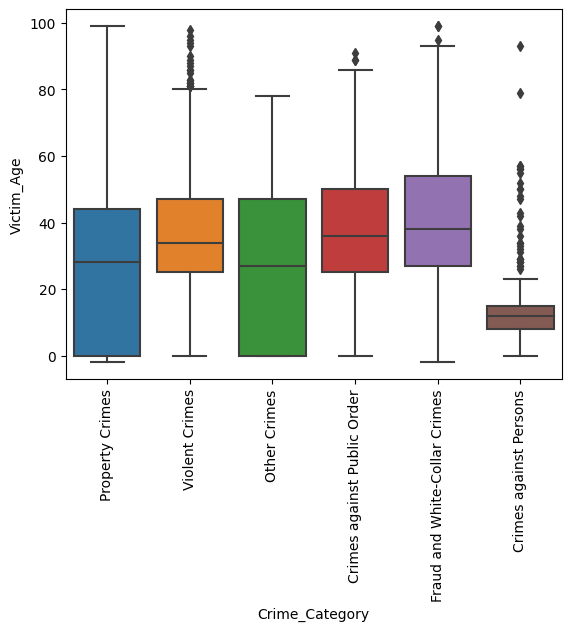

In [17]:
# Box plot of Victim_Age by Crime_Category
sns.boxplot(data=train, x='Crime_Category', y='Victim_Age')
plt.xticks(rotation=90)
plt.show()

 **geographic distribution of crimes**

Text(0, 0.5, 'Latitude')

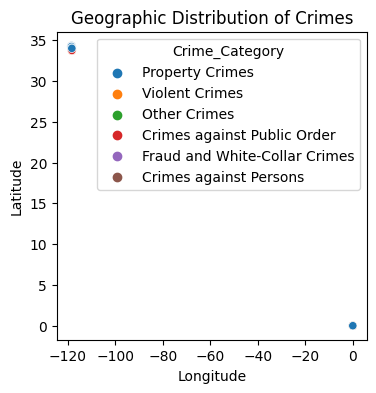

In [18]:
# geographic distribution of crimes
plt.figure(figsize=(4,4))
sns.scatterplot(x='Longitude', y='Latitude', hue='Crime_Category', data=train )
plt.title('Geographic Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

**Observation:**

- Crimes occur in various locations, with certain clusters highlighting areas with high crime rates.

# Correlation Heatmap

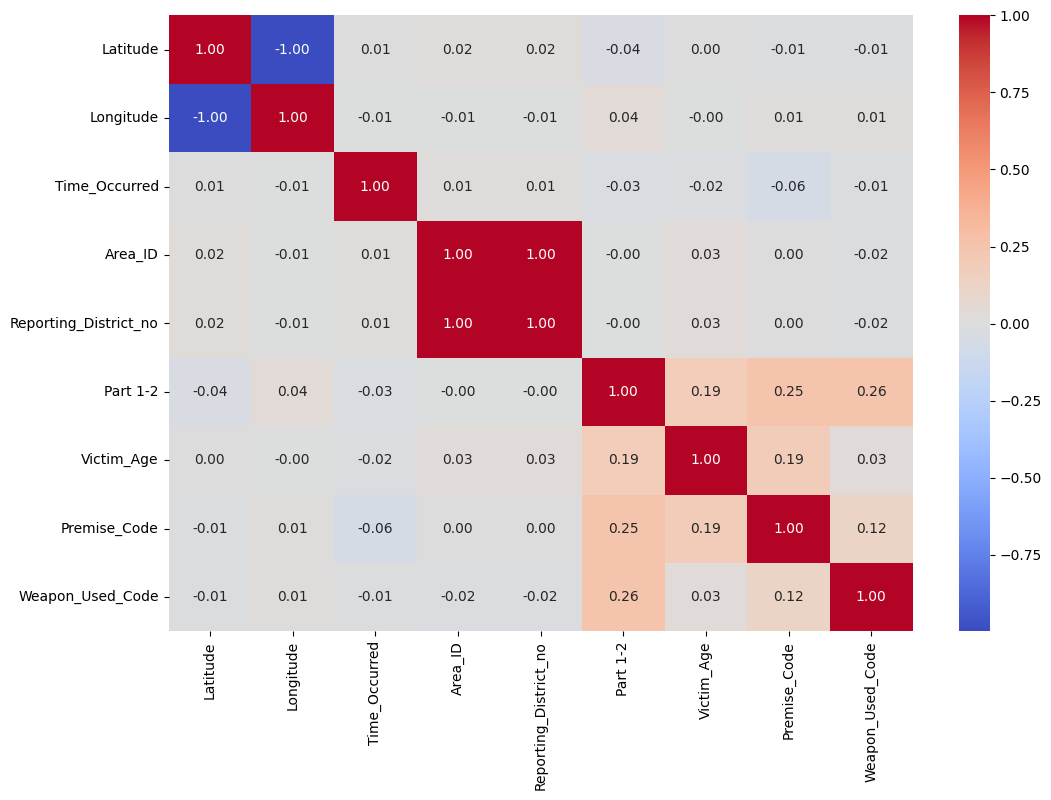

In [19]:
# Select only numerical columns
numerical = train.select_dtypes(include=['float64', 'int64'])

# Handle missing values in numerical columns, e.g., fill with the mean
numerical = numerical.fillna(numerical.mean())

# Compute the correlation matrix
corr = numerical.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# 5. **Data Preprocessing and Cleaning**

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [21]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [22]:
print(test.head())

                                   Location Cross_Street  Latitude  Longitude  \
0   1500    LEIGHTON                     AV          NaN   34.0128  -118.3045   
1    100 S  NORMANDIE                    AV          NaN   34.0726  -118.3029   
2    300 E  111TH                        ST          NaN   33.9348  -118.2695   
3   1300 S  LA BREA                      AV          NaN   34.0497  -118.3442   
4  11000    MORRISON                     ST          NaN   34.1611  -118.3704   

            Date_Reported           Date_Occurred  Time_Occurred  Area_ID  \
0  03/03/2020 12:00:00 AM  03/03/2020 12:00:00 AM         2000.0      3.0   
1  06/01/2020 12:00:00 AM  04/25/2020 12:00:00 AM         1700.0     20.0   
2  08/28/2020 12:00:00 AM  08/27/2020 12:00:00 AM          900.0     18.0   
3  12/23/2020 12:00:00 AM  12/03/2020 12:00:00 AM         2200.0      7.0   
4  08/30/2020 12:00:00 AM  08/29/2020 12:00:00 AM          130.0     15.0   

     Area_Name  Reporting_District_no  ...        

# Feature Engineering

* We can remove **Area_Name** as this information is redundant
* **Location** seems redundant as we have Latitude and Longitude
* **Cross_Street** has nearly 17K NaN values, so its better to remove it

In [23]:
features_to_drop = ['Area_Name', 'Location', 'Cross_Street', 'Reporting_District_no']

In [24]:
train = train.drop(features_to_drop, axis=1)
test = test.drop(features_to_drop, axis=1)

# Convert Date_Reported and Date_Occured to DateTime format

In [25]:
def process_date_column(df, column_name, date_format="%m/%d/%Y %I:%M:%S %p"):
    """
    Processes a date column in the DataFrame by removing the time part and extracting additional features.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column containing datetime values.

    Returns:
    pd.DataFrame: The DataFrame with the processed date column and additional features.
    """
    # Convert the column to datetime format
    df[column_name] = pd.to_datetime(df[column_name], format=date_format)

    # Remove the time part
    df[column_name] = df[column_name].dt.date

    # Extracting features from the date
    df[column_name+'_year'] = df[column_name].apply(lambda x: x.year)
    df[column_name+'_month'] = df[column_name].apply(lambda x: x.month)
    df[column_name+'_day'] = df[column_name].apply(lambda x: x.day)
    df[column_name+'_day_of_week'] = df[column_name].apply(lambda x: x.weekday())

    return df

**Function to convert Date_Reported and Date_Occured to DateTime format**

In [26]:
train = process_date_column(train, 'Date_Reported')
train = process_date_column(train, 'Date_Occurred')

In [27]:
test = process_date_column(test, 'Date_Reported')
test = process_date_column(test, 'Date_Occurred')

**Drop the redundant features**

In [28]:
features_to_drop = ['Date_Reported', 'Date_Occurred']

In [29]:
train = train.drop(features_to_drop, axis=1)
test = test.drop(features_to_drop, axis=1)

In [30]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   20000 non-null  float64
 1   Longitude                  20000 non-null  float64
 2   Time_Occurred              20000 non-null  float64
 3   Area_ID                    20000 non-null  float64
 4   Part 1-2                   20000 non-null  float64
 5   Modus_Operandi             17259 non-null  object 
 6   Victim_Age                 20000 non-null  float64
 7   Victim_Sex                 17376 non-null  object 
 8   Victim_Descent             17376 non-null  object 
 9   Premise_Code               20000 non-null  float64
 10  Premise_Description        19995 non-null  object 
 11  Weapon_Used_Code           7335 non-null   float64
 12  Weapon_Description         7335 non-null   object 
 13  Status                     20000 non-null  obj

In [31]:
train.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,Status_Description,Crime_Category,Date_Reported_year,Date_Reported_month,Date_Reported_day,Date_Reported_day_of_week,Date_Occurred_year,Date_Occurred_month,Date_Occurred_day,Date_Occurred_day_of_week
0,34.1522,-118.3910,1800.0,15.0,1.0,0385,75.0,M,W,101.0,...,Invest Cont,Property Crimes,2020,3,9,0,2020,3,6,4
1,34.0028,-118.2391,1345.0,13.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,...,Invest Cont,Property Crimes,2020,2,27,3,2020,2,27,3
2,34.0111,-118.2653,605.0,13.0,2.0,0329 1202,67.0,M,B,501.0,...,Invest Cont,Property Crimes,2020,8,21,4,2020,8,21,4
3,34.2953,-118.4590,1800.0,19.0,1.0,0329 1300,61.0,M,H,101.0,...,Invest Cont,Property Crimes,2020,11,8,6,2020,11,6,4
4,33.9787,-118.2918,1130.0,12.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,...,Invest Cont,Property Crimes,2020,2,25,1,2020,2,25,1


*Drop the columns of 'Date_Reported', 'Date_Occurred' as they are processed and converted to new columns*

In [32]:
test.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,Status,Status_Description,Date_Reported_year,Date_Reported_month,Date_Reported_day,Date_Reported_day_of_week,Date_Occurred_year,Date_Occurred_month,Date_Occurred_day,Date_Occurred_day_of_week
0,34.0128,-118.3045,2000.0,3.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,...,IC,Invest Cont,2020,3,3,1,2020,3,3,1
1,34.0726,-118.3029,1700.0,20.0,1.0,0344 0394,26.0,M,B,502.0,...,IC,Invest Cont,2020,6,1,0,2020,4,25,5
2,33.9348,-118.2695,900.0,18.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,...,IC,Invest Cont,2020,8,28,4,2020,8,27,3
3,34.0497,-118.3442,2200.0,7.0,1.0,NaN,0.0,NaN,NaN,108.0,...,IC,Invest Cont,2020,12,23,2,2020,12,3,3
4,34.1611,-118.3704,130.0,15.0,2.0,1501,37.0,F,W,501.0,...,AO,Adult Other,2020,8,30,6,2020,8,29,5


# Converting Time_Occurred

**Processes a time column in 24-hour military time format and extracts additional features.**

In [33]:
def process_time_occurred(df, time_col='Time_Occurred'):
    """
    Processes a time column in 24-hour military time format and extracts additional features.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    time_col (str): The name of the column containing time values in 24-hour military time format.

    Returns:
    pd.DataFrame: The DataFrame with the processed time column and additional features.
    """
    # Ensure the time column is a string and pad with zeros if necessary
    df[time_col] = df[time_col].apply(lambda x: f'{int(x):04d}')

    # Extract hour and minute
    df['hour'] = df[time_col].apply(lambda x: int(x[:2]))
    df['minute'] = df[time_col].apply(lambda x: int(x[2:]))

    # Create part of day feature
    df['part_of_day'] = df['hour'].apply(lambda x: 'morning' if 5 <= x < 12 else
                                                    'afternoon' if 12 <= x < 17 else
                                                    'evening' if 17 <= x < 21 else
                                                    'night')

    df = df.drop(columns=['hour', 'minute', time_col])

    return df

In [34]:
train = process_time_occurred(train, 'Time_Occurred')
test = process_time_occurred(test, 'Time_Occurred')

In [35]:
train.head()

,Latitude,Longitude,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,...,Crime_Category,Date_Reported_year,Date_Reported_month,Date_Reported_day,Date_Reported_day_of_week,Date_Occurred_year,Date_Occurred_month,Date_Occurred_day,Date_Occurred_day_of_week,part_of_day
0,34.1522,-118.3910,15.0,1.0,0385,75.0,M,W,101.0,STREET,...,Property Crimes,2020,3,9,0,2020,3,6,4,evening
1,34.0028,-118.2391,13.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,...,Property Crimes,2020,2,27,3,2020,2,27,3,afternoon
2,34.0111,-118.2653,13.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,...,Property Crimes,2020,8,21,4,2020,8,21,4,morning
3,34.2953,-118.4590,19.0,1.0,0329 1300,61.0,M,H,101.0,STREET,...,Property Crimes,2020,11,8,6,2020,11,6,4,evening
4,33.9787,-118.2918,12.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,...,Property Crimes,2020,2,25,1,2020,2,25,1,morning


# Remove Description features

In [36]:
features_to_drop = ['Weapon_Description', 'Status_Description', 'Premise_Description']

In [37]:
train = train.drop(features_to_drop, axis=1)
test = test.drop(features_to_drop, axis=1)

# Vectorizing Modus_Operandi

In [38]:
test['Modus_Operandi'].value_counts()

Modus_Operandi
0344                                            199
0329                                            141
1501                                             48
0329 1300                                        35
0329 1822                                        35
                                               ... 
0913 1802 1206 0532 0510 0519 0507 0527 1402      1
2004 0325 0344                                    1
1822 1309 1308 0344                               1
1300 1822 0344 0358 1609 1307                     1
1300 0325                                         1
Name: count, Length: 2961, dtype: int64

In [39]:
train['Modus_Operandi'].value_counts()

Modus_Operandi
0344                                       826
0329                                       583
1501                                       187
0329 1300                                  135
0325                                       127
                                          ... 
1609 0329 1307 0344                          1
0344 2050 0910 2034                          1
0400 2000 0913                               1
1822 0342 0910 2049 2051 0305 0444 0344      1
1202 2038 0913 0602 1242 0553                1
Name: count, Length: 10489, dtype: int64

**In train and test data the Modus_Operandi has null values so we are filling the null values using mode strategy**

In [40]:
train['Modus_Operandi'].fillna(train['Modus_Operandi'].mode()[0], inplace=True)

/tmp/ipykernel_18/3909684890.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Modus_Operandi'].fillna(train['Modus_Operandi'].mode()[0], inplace=True)


In [41]:
test['Modus_Operandi'].fillna(test['Modus_Operandi'].mode()[0], inplace=True)

/tmp/ipykernel_18/3580727973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Modus_Operandi'].fillna(test['Modus_Operandi'].mode()[0], inplace=True)


**Fit and transform the 'Modus_Operandi' sentences into TF-IDF vectors**

* TF-IDF stands for term frequency-inverse document frequency

*  Term frequency Inverse document frequency (TFIDF) is a statistical formula to convert text documents into vectors based on the relevancy of the word

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_train_vectorizer = TfidfVectorizer()

# Fit and transform the sentences into TF-IDF vectors
tfidf_train_matrix = tfidf_train_vectorizer.fit_transform(train['Modus_Operandi'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_train_df = pd.DataFrame(tfidf_train_matrix.toarray(), columns=tfidf_train_vectorizer.get_feature_names_out())

tfidf_train_df

,0100,0104,0105,0110,0112,0113,0114,0115,0117,0120,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:

# Fit and transform the sentences into TF-IDF vectors
tfidf_test_matrix = tfidf_train_vectorizer.transform(test['Modus_Operandi'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_test_df = pd.DataFrame(tfidf_test_matrix.toarray(), columns=tfidf_train_vectorizer.get_feature_names_out())

tfidf_test_df

,0100,0104,0105,0110,0112,0113,0114,0115,0117,0120,...,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.342421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
train['Crime_Category']

0                    Property Crimes
1                    Property Crimes
2                    Property Crimes
3                    Property Crimes
4                    Property Crimes
                    ...             
19995                 Violent Crimes
19996                Property Crimes
19997                Property Crimes
19998    Crimes against Public Order
19999                Property Crimes
Name: Crime_Category, Length: 20000, dtype: object


This code selects the top k features from TF-IDF vectors of a training dataset using the chi-squared statistic for feature selection, and creates DataFrames containing only these selected features for both the training and test datasets.

1. Chi-Squared (chi2) Test

Purpose: Measures the association between categorical input features and a categorical target variable.

Type: Non-parametric test.

Application: Used when both the features and the target variable are categorical.

Method:
The chi-squared test calculates the difference between the observed frequency and the expected frequency of occurrences for each combination of feature values and class labels.
The null hypothesis is that the features and the target variable are independent.
A higher chi-squared statistic indicates a stronger relationship between the feature and the target.
Limitation: Not suitable for continuous data. Requires features to be categorical, so continuous features must be discretized (binned) before applying the chi2 test.

In [45]:
from sklearn.feature_selection import SelectKBest, chi2

# Define the number of features you want to keep
k_best_features_train = 200  # Adjust this value based on experimentation (Trial and error)

# Select the top k features using chi-squared statistic (you can choose a different scoring function)
selector_train = SelectKBest(chi2, k=k_best_features_train)
X_train_selected = selector_train.fit_transform(tfidf_train_df, train["Crime_Category"].copy())  # 'y' is your target variable
X_test_selected = selector_train.transform(tfidf_test_df)

# Get the indices of the selected features
selected_train_feature_indices = selector_train.get_support(indices=True)


# Get the feature names corresponding to the selected indices
selected_train_feature_names = tfidf_train_vectorizer.get_feature_names_out()[selected_train_feature_indices]


# Create a DataFrame with the selected features
best_train_tfidf_df = pd.DataFrame(X_train_selected, columns=selected_train_feature_names)
best_test_tfidf_df = pd.DataFrame(X_test_selected, columns=selected_train_feature_names)

best_train_tfidf_df

,0100,0104,0112,0113,0120,0121,0209,0216,0220,0302,...,2033,2038,2040,2041,2047,2049,2060,2126,2304,4025
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.616438,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.350281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Reset the index of both DataFrames (train and best_train_tfidf_df) to a default integer index starting from 0. The old index is not kept as a column, and the changes are made directly to the original DataFrames.

In [46]:
train.reset_index(drop=True, inplace=True)
best_train_tfidf_df.reset_index(drop=True, inplace=True)

In [47]:
test.reset_index(drop=True, inplace=True)
best_test_tfidf_df.reset_index(drop=True, inplace=True)

In [48]:
train = pd.concat([train, best_train_tfidf_df], axis=1)
train = train.drop(['Modus_Operandi'], axis = 1)
train

,Latitude,Longitude,Area_ID,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,...,2033,2038,2040,2041,2047,2049,2060,2126,2304,4025
0,34.1522,-118.3910,15.0,1.0,75.0,M,W,101.0,NaN,IC,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0028,-118.2391,13.0,1.0,41.0,M,H,216.0,400.0,IC,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0111,-118.2653,13.0,2.0,67.0,M,B,501.0,NaN,IC,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34.2953,-118.4590,19.0,1.0,61.0,M,H,101.0,NaN,IC,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33.9787,-118.2918,12.0,1.0,0.0,X,X,401.0,400.0,IC,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,3.0,2.0,51.0,M,H,501.0,400.0,IC,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,34.2212,-118.5011,10.0,1.0,0.0,M,W,301.0,NaN,IC,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,34.0571,-118.3815,8.0,1.0,42.0,M,H,102.0,NaN,IC,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,33.7451,-118.2835,5.0,2.0,76.0,F,H,501.0,NaN,IC,...,0.0,0.350281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
test = pd.concat([test, best_test_tfidf_df], axis=1)
test = test.drop(['Modus_Operandi'], axis = 1)
test

,Latitude,Longitude,Area_ID,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,...,2033,2038,2040,2041,2047,2049,2060,2126,2304,4025
0,34.0128,-118.3045,3.0,2.0,28.0,F,H,501.0,400.0,IC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.0726,-118.3029,20.0,1.0,26.0,M,B,502.0,NaN,IC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.9348,-118.2695,18.0,2.0,62.0,F,B,721.0,NaN,IC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34.0497,-118.3442,7.0,1.0,0.0,NaN,NaN,108.0,NaN,IC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,34.1611,-118.3704,15.0,2.0,37.0,F,W,501.0,NaN,AO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,7.0,1.0,0.0,NaN,NaN,101.0,NaN,IC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,34.0347,-118.2253,4.0,1.0,0.0,X,X,116.0,NaN,IC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,34.2392,-118.4698,19.0,2.0,38.0,M,H,101.0,400.0,AA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,34.0453,-118.2443,1.0,2.0,41.0,M,B,502.0,500.0,AO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Pre-processing

* Month, Day of the Week, part of day, Area ID, Part 1-2 - **One Hot Encoding**
* Victim Age - **Clean, Impute, Scale**
* Victim Sex, Victim Descent - **Impute, One-Hot Encode**
* 'Premise_Code', 'Weapon_Used_Code', 'Status' - **One Hot Enocder**
* Crime_Category - Target, **Categorical encoder**

# Removing impossible values from Victim_Age

This code replaces impossible values in the Victim_Age column with NaN and then provides a summary of the column's statistics.

In [50]:
# Replace impossible values in the Victim_Age column with NaN
train['Victim_Age'] = train['Victim_Age'].apply(lambda x: np.nan if (x <= 0 or x > 120) else x)

# Verify the changes
train['Victim_Age'].describe()

count    15166.000000
mean        39.740736
std         15.767421
min          2.000000
25%         28.000000
50%         37.000000
75%         50.000000
max         99.000000
Name: Victim_Age, dtype: float64

In [51]:
# Replace impossible values in the Victim_Age column with NaN
test['Victim_Age'] = test['Victim_Age'].apply(lambda x: np.nan if (x <= 0 or x > 120) else x)

# Verify the changes
test['Victim_Age'].describe()

count    3809.000000
mean       40.158834
std        15.657499
min         2.000000
25%        28.000000
50%        37.000000
75%        51.000000
max        99.000000
Name: Victim_Age, dtype: float64

In [52]:
# Get feature names from the preprocessor
def get_feature_names(column_transformer):
    feature_names = []
    for name, pipe, features in column_transformer.transformers_:
        if name != 'remainder':
            if isinstance(pipe, Pipeline):
                if isinstance(pipe.steps[-1][1], OneHotEncoder):
                    feature_names.extend(pipe.named_steps['encoder'].get_feature_names_out(features))
                else:
                    feature_names.extend(features)
            else:
                feature_names.extend(pipe.get_feature_names_out(features))
    return feature_names

Assiging the Crime_Category as the target variable and dropping it from the training set

In [53]:
target = train.Crime_Category.copy()
train = train.drop(['Crime_Category'], axis=1)

In [54]:
test.shape

(5000, 219)

In [55]:
train.shape

(20000, 219)

In [56]:
test.columns[:21]

Index(['Latitude', 'Longitude', 'Area_ID', 'Part 1-2', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code',
       'Status', 'Date_Reported_year', 'Date_Reported_month',
       'Date_Reported_day', 'Date_Reported_day_of_week', 'Date_Occurred_year',
       'Date_Occurred_month', 'Date_Occurred_day', 'Date_Occurred_day_of_week',
       'part_of_day', '0100', '0104'],
      dtype='object')

In [57]:
train.columns[:21]

Index(['Latitude', 'Longitude', 'Area_ID', 'Part 1-2', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code',
       'Status', 'Date_Reported_year', 'Date_Reported_month',
       'Date_Reported_day', 'Date_Reported_day_of_week', 'Date_Occurred_year',
       'Date_Occurred_month', 'Date_Occurred_day', 'Date_Occurred_day_of_week',
       'part_of_day', '0100', '0104'],
      dtype='object')

# Pipeline and Column transformer

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Columns requiring preprocessing
preprocess_columns = ['Date_Reported_month', 'Date_Occurred_month', 'Date_Reported_day_of_week', 'Date_Occurred_day_of_week', 'part_of_day', 'Area_ID', 'Part 1-2',
                        'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status', 'Victim_Age', 'Latitude', 'Longitude']

# Columns to leave untouched
untouched_columns = [col for col in train.columns if col not in preprocess_columns]

# Define preprocessing steps for each column type
# Categorical features
categorical_features = ['Date_Reported_month', 'Date_Occurred_month', 'Date_Reported_day_of_week', 'Date_Occurred_day_of_week', 'part_of_day', 'Area_ID', 'Part 1-2',
                        'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status']

# Numeric features
numeric_features = ['Victim_Age', 'Latitude', 'Longitude']

# Preprocessing pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline for numeric features (including age cleaning)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Column Transformer to apply different pipelines to different columns
preprocessor_train = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_features),
    ('num', numeric_pipeline, numeric_features)
], remainder='passthrough')  # Remainder will pass through untouched columns

# Apply the preprocessing pipeline to the data
processed_train = preprocessor_train.fit_transform(train)
processed_test = preprocessor_train.transform(test)

# Get the feature names
feature_names_train = get_feature_names(preprocessor_train)

# Combine with untouched columns
all_feature_names = feature_names_train + untouched_columns

# Convert the processed data back to a DataFrame
processed_train = pd.DataFrame(processed_train, columns = all_feature_names)
processed_test = pd.DataFrame(processed_test, columns = all_feature_names)

for column in processed_train.columns:
    processed_train[column] = processed_train[column].astype(float)
    processed_test[column] = processed_test[column].astype(float)

# Check the processed DataFrame
processed_train

,Date_Reported_month_1,Date_Reported_month_2,Date_Reported_month_3,Date_Reported_month_4,Date_Reported_month_5,Date_Reported_month_6,Date_Reported_month_7,Date_Reported_month_8,Date_Reported_month_9,Date_Reported_month_10,...,2033,2038,2040,2041,2047,2049,2060,2126,2304,4025
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.350281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
processed_test

,Date_Reported_month_1,Date_Reported_month_2,Date_Reported_month_3,Date_Reported_month_4,Date_Reported_month_5,Date_Reported_month_6,Date_Reported_month_7,Date_Reported_month_8,Date_Reported_month_9,Date_Reported_month_10,...,2033,2038,2040,2041,2047,2049,2060,2126,2304,4025
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking if there there are any categorical variables in the dataset

as the processed_train and processed_test should only contain numerical dataset

In [60]:
processed_train.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

In [61]:
processed_test.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

**Observation**

- All the categorical variable has been processed into numerical using preprocessing strategies and pipeline

In [62]:
processed_train.dtypes

Date_Reported_month_1    float64
Date_Reported_month_2    float64
Date_Reported_month_3    float64
Date_Reported_month_4    float64
Date_Reported_month_5    float64
                          ...   
2049                     float64
2060                     float64
2126                     float64
2304                     float64
4025                     float64
Length: 572, dtype: object

In [63]:
processed_test.dtypes

Date_Reported_month_1    float64
Date_Reported_month_2    float64
Date_Reported_month_3    float64
Date_Reported_month_4    float64
Date_Reported_month_5    float64
                          ...   
2049                     float64
2060                     float64
2126                     float64
2304                     float64
4025                     float64
Length: 572, dtype: object

Selecting the top k=250 features using chi-squared statistic to reduce the less weightage features 
(finding K is based on the trial and error process)

2. ANOVA F-Test (f_classif)

Purpose: Measures the linear relationship between continuous input features and a categorical target variable.

Type: Parametric test.

Application: Used when the features are continuous, and the target variable is categorical.

Method:
The ANOVA F-test compares the variances between the groups (classes) relative to the variances within the groups.
It calculates an F-statistic, which is the ratio of variance explained by the feature to the variance within the classes.
A higher F-statistic indicates that the feature is more likely to be related to the target variable.
Limitation: Assumes that the data is normally distributed and that variances between groups are equal (homoscedasticity).

In [64]:
from sklearn.feature_selection import f_classif

# Define the number of features you want to keep
k_best_features = 250  # Adjust this value based on experimentation

# Select the top k features using chi-squared statistic (you can choose a different scoring function)
selector = SelectKBest(f_classif, k=k_best_features)
X_selected_train = selector.fit_transform(processed_train, target)  # 'y' is your target variable
X_selected_test = selector.transform(processed_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the feature names corresponding to the selected indices
selected_feature_names = processed_train.columns[selected_feature_indices]

# Create a DataFrame with the selected features
processed_train = pd.DataFrame(X_selected_train, columns=selected_feature_names)
processed_test= pd.DataFrame(X_selected_test, columns=selected_feature_names)

processed_train

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [370] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Date_Reported_day_of_week_6,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night,Area_ID_1.0,Area_ID_8.0,Area_ID_12.0,Area_ID_14.0,Area_ID_18.0,...,2021,2024,2032,2033,2038,2040,2041,2126,2304,4025
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.350281,0.0,0.0,0.0,0.0,0.0


In [65]:
processed_test

,Date_Reported_day_of_week_6,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night,Area_ID_1.0,Area_ID_8.0,Area_ID_12.0,Area_ID_14.0,Area_ID_18.0,...,2021,2024,2032,2033,2038,2040,2041,2126,2304,4025
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
processed_train.dtypes

Date_Reported_day_of_week_6    float64
part_of_day_afternoon          float64
part_of_day_evening            float64
part_of_day_morning            float64
part_of_day_night              float64
                                ...   
2040                           float64
2041                           float64
2126                           float64
2304                           float64
4025                           float64
Length: 250, dtype: object

Encoding the target variable to numerical datatype

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

# **6. Model training**

**model_names** = 
[
*     "LogisticRegression",
*     "gridCV_LogisticRegression",
*     "KNeighborsClassifier",
*     "RandomForestClassifier",
*     "SGDClassifier",
*     "SVC",
*     "LightGBM",
*     "XGBoost",
*     "Randomized_XGB",
*     "MLPClassifier",
*     "DecisionTreeClassifier",
*       "CART"

]

In [68]:
processed_train

,Date_Reported_day_of_week_6,part_of_day_afternoon,part_of_day_evening,part_of_day_morning,part_of_day_night,Area_ID_1.0,Area_ID_8.0,Area_ID_12.0,Area_ID_14.0,Area_ID_18.0,...,2021,2024,2032,2033,2038,2040,2041,2126,2304,4025
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.350281,0.0,0.0,0.0,0.0,0.0


In [69]:
# define features and target variable for training data
# X_train = train.drop(columns=['Crime_Category'])
# y_train = train['Crime_Category']

# split the training data further into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(processed_train, target, test_size=0.2, random_state=42)

print(X_train_split.shape, X_val_split.shape, y_train_split.shape, y_val_split.shape)

(16000, 250) (4000, 250) (16000,) (4000,)


In [70]:
X_train_split.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

**Importing all the necessary libraries**

In [71]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier

list for storing all model accuracies

In [72]:
accuracies = [] #list for storing all model accuracies

In [73]:
# Function to evaluate models

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred)
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    con = confusion_matrix(y_val,y_val_pred)
    display = ConfusionMatrixDisplay(con)
    display.plot()
    return accuracy, report, conf_matrix

# Logistic Regression

1. LogisticRegression

Type: Linear Model

Use Case: Binary classification (can be extended to multi-class with modifications).

Description: Logistic Regression estimates the probability that a given input point belongs to a certain class. It does this by modeling the data using a logistic function (sigmoid) and optimizing a loss function like log loss.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.921
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.50      0.44        32
           1       0.82      0.76      0.79       374
           2       0.93      0.92      0.92       267
           3       0.40      0.11      0.18        35
           4       0.97      0.97      0.97      2303
           5       0.87      0.91      0.89       989

    accuracy                           0.92      4000
   macro avg       0.73      0.70      0.70      4000
weighted avg       0.92      0.92      0.92      4000



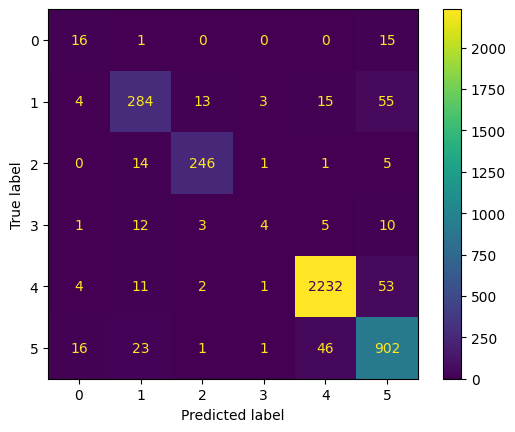

In [74]:
# Logistic Regression
lg = LogisticRegression(random_state=42, max_iter=5000)
lg_accuracy, lg_report, lg_conf_matrix = evaluate_model(lg, X_train_split, y_train_split, X_val_split, y_val_split)
print("Logistic Regression")
print("Accuracy:", lg_accuracy)
print("Classification Report:\n", lg_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" lg_conf_matrix)
accuracies.append(lg_accuracy)

Logistic Regression
Accuracy: 0.921 is good

# HyperParameter Tuning

# Grid Search for LogisticRegression

2. gridCV_LogisticRegression

Type: Logistic Regression with Hyperparameter Tuning

Use Case: Optimizing the performance of Logistic Regression.

Description: This is Logistic Regression combined with GridSearchCV, which exhaustively searches over specified hyperparameter values (like regularization strength) to find the best model configuration.

In [75]:
from sklearn.model_selection import GridSearchCV
import warnings

Using Gridsearch CV to find the best parameters for the model

**L1 Regularization:**

Results in sparse models (some coefficients are zero).

Suitable for feature selection.

Leads to a more interpretable model.

**L2 Regularization:**

Results in smaller coefficients (no sparsity).

Helps to reduce overfitting.

Suitable when you believe all features contribute to the model.

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

HyperParameter Tuning for LogisticRegression
{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.94525
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.47      0.52        32
           1       0.86      0.83      0.85       374
           2       0.96      0.94      0.95       267
           3       0.52      0.34      0.41        35
           4       0.98      0.98      0.98      2303
           5       0.91      0.94      0.93       989

    accuracy                           0.95      4000
   macro avg       0.80      0.75      0.77      4000
weighted avg       0.94      0.95      0.94      4000



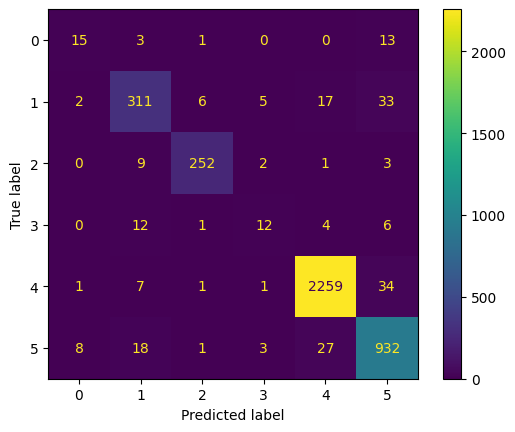

In [76]:
warnings.filterwarnings('ignore')
lr_param = {
    "penalty":['l1'],
    "C": [2,5],
    "solver":['saga','liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(),param_grid=lr_param,cv=3,n_jobs=-1,verbose=3)
grid_search_lr_accuracy, grid_search_lr_report,grid_search_lr_conf_matrix = evaluate_model(grid_search_lr, X_train_split, y_train_split, X_val_split, y_val_split)
print("HyperParameter Tuning for LogisticRegression")
print(grid_search_lr.best_params_)
print("Accuracy:", grid_search_lr_accuracy)
print("Classification Report:\n", grid_search_lr_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" grid_search_lr_conf_matrix)
accuracies.append(grid_search_lr_accuracy)

HyperParameter Tuning for LogisticRegression
{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}

**Accuracy: 0.945** accuracy is better than above after using hyperparameter tuning

**Use liblinear if:**

You have a small to medium-sized dataset.

You are only interested in L1 or L2 regularization.

You don't need parallel processing or Elastic Net regularization.

**Use SAGA if:**

You have a large dataset or many features.

You need to use Elastic Net regularization.

You want to take advantage of parallel processing for faster convergence.

# KNeighborsClassifier

3. KNeighborsClassifier

Type: Instance-Based Learning

Use Case: Classification tasks where the decision boundary is not linear.

Description: K-Nearest Neighbors (KNN) classifies a sample based on the majority label of its k closest neighbors in the feature space. It is simple but can be computationally expensive, especially with large datasets.

KNeighbors Classifier
Accuracy: 0.755
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.22      0.30        32
           1       0.52      0.33      0.41       374
           2       0.60      0.55      0.57       267
           3       0.17      0.03      0.05        35
           4       0.81      0.95      0.88      2303
           5       0.70      0.55      0.62       989

    accuracy                           0.76      4000
   macro avg       0.55      0.44      0.47      4000
weighted avg       0.73      0.76      0.74      4000



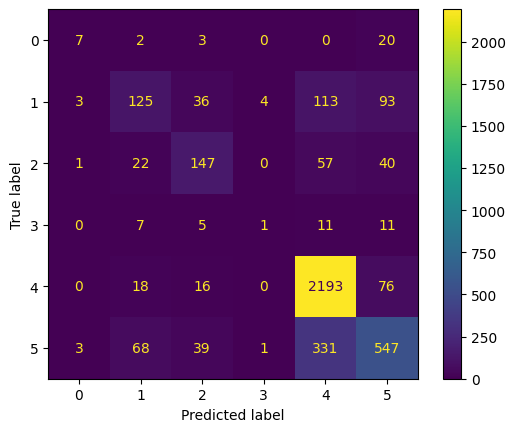

In [77]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn_accuracy, knn_report,knn_conf_matrix = evaluate_model(knn, X_train_split, y_train_split, X_val_split, y_val_split)
print("KNeighbors Classifier")
print("Accuracy:", knn_accuracy)
print("Classification Report:\n", knn_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" knn_conf_matrix)
accuracies.append(knn_accuracy)

KNeighbors Classifier

Accuracy: 0.755 is lesser as n_neighbours needed to be tuned and from this we can observe that the n_neighbour = 5 is not an appropriate value.

# RandomForest Classifier

4. RandomForestClassifier

Type: Ensemble Learning, Decision Trees

Use Case: Classification with high-dimensional or unstructured data.

Description: Random Forest is an ensemble of decision trees, where each tree is trained on a random subset of the data. The final classification is based on the majority vote from all the trees. It handles overfitting better than individual decision trees.

RandomForest Classifier
Accuracy: 0.94575
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.34      0.45        32
           1       0.85      0.79      0.82       374
           2       0.93      0.92      0.93       267
           3       0.75      0.09      0.15        35
           4       0.99      0.99      0.99      2303
           5       0.89      0.97      0.93       989

    accuracy                           0.95      4000
   macro avg       0.84      0.68      0.71      4000
weighted avg       0.94      0.95      0.94      4000



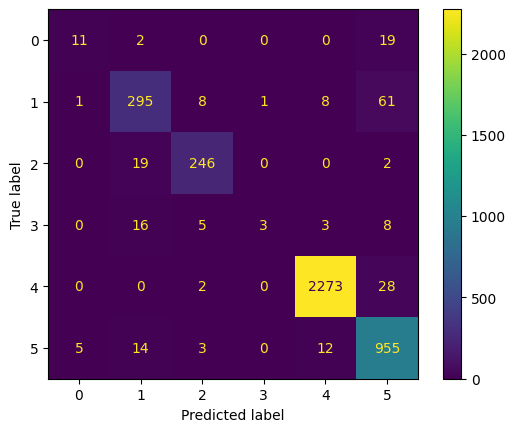

In [78]:
# RandomForest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc_accuracy, rfc_report,rfc_conf_matrix = evaluate_model(rfc, X_train_split, y_train_split, X_val_split, y_val_split)
print("RandomForest Classifier")
print("Accuracy:", rfc_accuracy)
print("Classification Report:\n", rfc_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" rfc_conf_matrix)
accuracies.append(rfc_accuracy)

RandomForest Classifier

Accuracy: 0.94575 accuracy is excellent and the model runs faster

# GridSearchCV - SGDClassifier

5. SGDClassifier

Type: Linear Model with Stochastic Gradient Descent

Use Case: Large-scale and sparse datasets, especially with high-dimensional data.

Description: This classifier implements linear models with stochastic gradient descent (SGD) learning. It is useful for classification tasks, especially when the dataset is too large to fit into memory or when training needs to be done in an online fashion.

{'alpha': 0.001, 'eta0': 0.01}
 Stochastic Gradient Descent Classifier
Accuracy: 0.0935
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.09      1.00      0.17       374
           2       0.00      0.00      0.00       267
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00      2303
           5       0.00      0.00      0.00       989

    accuracy                           0.09      4000
   macro avg       0.02      0.17      0.03      4000
weighted avg       0.01      0.09      0.02      4000



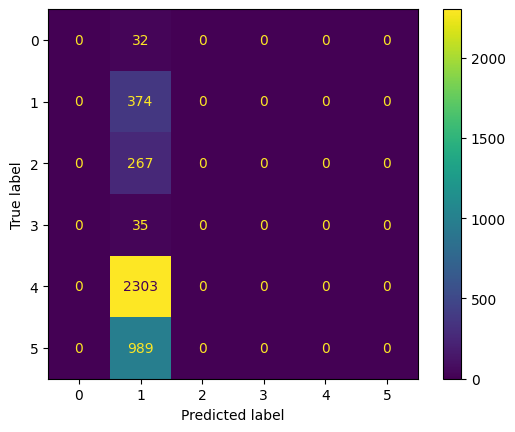

In [79]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier(loss='log_loss',learning_rate='constant',random_state=1729)

param_grid = {
    'alpha':[0.001, 0.005],
    'eta0':[0.01, 0.1]
}
grid_sgd = GridSearchCV(sgd,param_grid,scoring='accuracy')

grid_sgd_accuracy, grid_sgd_report, grid_sgd_conf_matrix = evaluate_model(grid_sgd, X_train_split, y_train_split, X_val_split, y_val_split)
print(grid_sgd.best_params_)
print(" Stochastic Gradient Descent Classifier")
print("Accuracy:", grid_sgd_accuracy)
print("Classification Report:\n", grid_sgd_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" grid_sgd_conf_matrix)
accuracies.append(grid_sgd_accuracy)

{'alpha': 0.001, 'eta0': 0.01}
 Stochastic Gradient Descent Classifier
 
Accuracy: 0.0935 accuracy is very less as the parameters is not tuned appropriately or the parameters passed to the model is not enough.

Precision for all 6 class is 0.

This is mainly to the differnce in the model score and to show the importance of the model parameters.

# Support Vector Classifier

6. SVC (Support Vector Classifier)

Type: Linear and Non-Linear Classifier

Use Case: High-dimensional space classification, especially with clear margins of separation.

Description: Support Vector Classifier finds the hyperplane that best separates the classes with the maximum margin. It can also handle non-linear classification through kernel functions (e.g., RBF, polynomial).

Support Vector Classifier
Accuracy: 0.57575
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00       374
           2       0.00      0.00      0.00       267
           3       0.00      0.00      0.00        35
           4       0.58      1.00      0.73      2303
           5       0.00      0.00      0.00       989

    accuracy                           0.58      4000
   macro avg       0.10      0.17      0.12      4000
weighted avg       0.33      0.58      0.42      4000



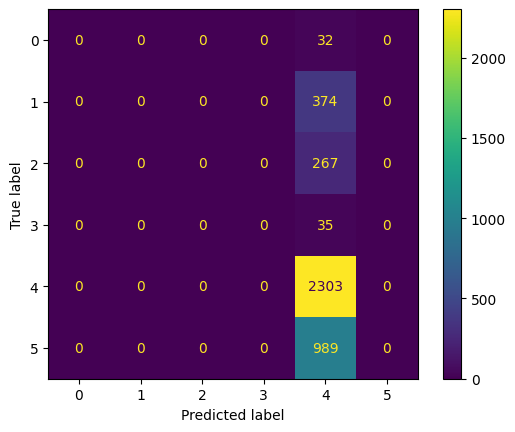

In [80]:
# Support Vector Classifier
svc = SVC(random_state=42)
svc_accuracy, svc_report, svc_conf_matrix = evaluate_model(svc, X_train_split, y_train_split, X_val_split, y_val_split)
print("Support Vector Classifier")
print("Accuracy:", svc_accuracy)
print("Classification Report:\n", svc_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" svc_conf_matrix)
accuracies.append(svc_accuracy)

Support Vector Classifier

Accuracy: 0.57575 - Accuracy is less

Precision is 0 for all class except class 4.

# LightGBM

7. LightGBM

Type: Gradient Boosting Decision Tree

Use Case: Classification tasks with large datasets and features.

Description: LightGBM (Light Gradient Boosting Machine) is an efficient and scalable implementation of gradient boosting, optimized for speed and memory usage. It can handle large-scale data and is often faster than other boosting methods like XGBoost.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10013
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 195
[LightGBM] [Info] Start training from score -4.417654
[LightGBM] [Info] Start training from score -2.412121
[LightGBM] [Info] Start training from score -2.688248
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.535823
[LightGBM] [Info] Start training from score -1.443394
LightGBM
Accuracy: 0.954
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.83      0.86      0.84       374
           2       0.96      

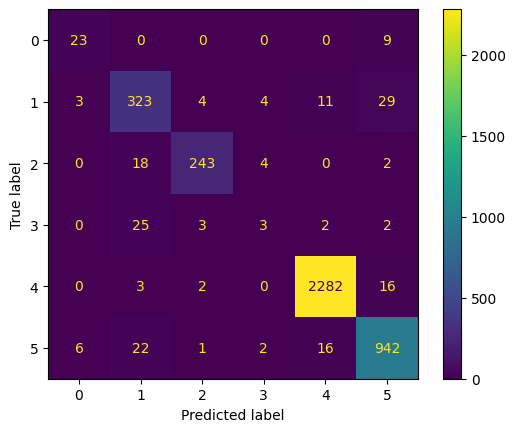

In [81]:
# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm_accuracy, lgbm_report, lgbm_conf_matrix = evaluate_model(lgbm, X_train_split, y_train_split, X_val_split, y_val_split)
print("LightGBM")
print("Accuracy:", lgbm_accuracy)
print("Classification Report:\n", lgbm_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" lgbm_conf_matrix)
accuracies.append(lgbm_accuracy)

LightGBM

Accuracy: 0.954 - Accuracy is excellent, so from this we observe the boosting technique works better for our dataset.

# XGBoost

8. XGBoost

Type: Gradient Boosting Decision Tree

Use Case: Classification tasks, especially on tabular data.

Description: XGBoost (Extreme Gradient Boosting) is an implementation of gradient boosted decision trees designed for speed and performance. It is one of the most popular models in machine learning competitions due to its robust performance.

XGBoost
Accuracy: 0.954
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.84      0.85      0.85       374
           2       0.96      0.92      0.94       267
           3       0.38      0.17      0.24        35
           4       0.99      0.99      0.99      2303
           5       0.93      0.95      0.94       989

    accuracy                           0.95      4000
   macro avg       0.80      0.77      0.78      4000
weighted avg       0.95      0.95      0.95      4000



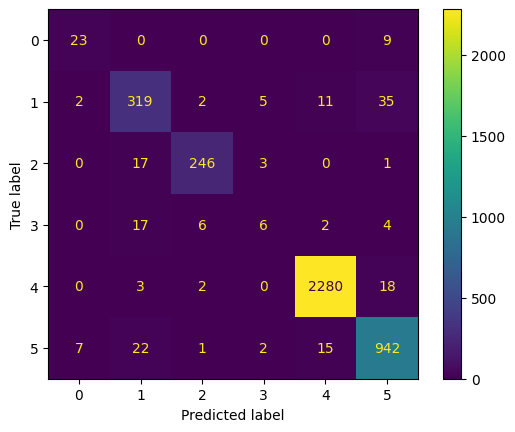

In [82]:
# XGBoost
xgb = XGBClassifier(random_state=42)
xgb_accuracy, xgb_report, xgb_conf_matrix = evaluate_model(xgb, X_train_split, y_train_split, X_val_split, y_val_split)
print("XGBoost")
print("Accuracy:", xgb_accuracy)
print("Classification Report:\n", xgb_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" xgb_conf_matrix)
accuracies.append(xgb_accuracy)

XGBoost

Accuracy: 0.954 - Accuracy is excellent, so from this we observe that the boosting technique works better for our dataset.

# Hyperparameter tuning

# Randomized Search for XGBoost

9. Randomized_XGB

Type: XGBoost with Hyperparameter Tuning

Use Case: Optimization of XGBoost performance.

Description: This refers to XGBoost combined with RandomizedSearchCV for hyperparameter tuning, where a random set of hyperparameters is tested, rather than an exhaustive search as in GridSearchCV.

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=100;, score=0.947 total time=  14.0s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=100;, score=0.953 total time=  13.6s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=100;, score=0.951 total time=  14.2s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=110;, score=0.948 total time=  15.0s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=110;, score=0.954 total time=  15.1s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=110;, score=0.951 total time=  15.1s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.15, max_depth=7, min_child_weight=4, n_estimators=100;, score=0.949

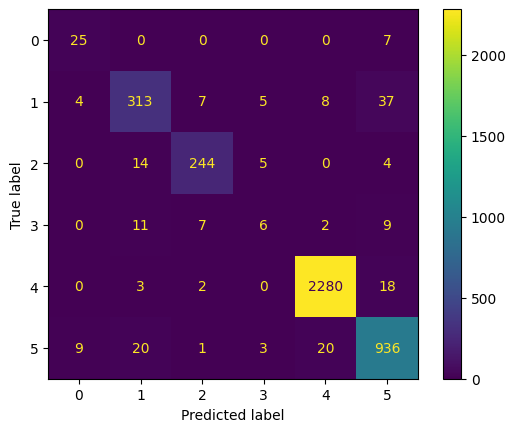

In [83]:
# XGBoost
xgb_refined_params = {
    'n_estimators': [100, 110],
    'learning_rate': [0.1, 0.15],
    'max_depth': [7],
    'min_child_weight': [4],
    'colsample_bytree': [0.7]
}

grid_search_xgb_refined = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=xgb_refined_params, cv=3, n_jobs=-1, verbose=3, random_state=42, n_iter=100)

grid_xgb_accuracy, grid_xgb_report, grid_xgb_conf_matrix = evaluate_model(grid_search_xgb_refined, X_train_split, y_train_split, X_val_split, y_val_split)

print(grid_search_xgb_refined.best_estimator_)
print("XGBoost")
print("Accuracy:", grid_xgb_accuracy)
print("Classification Report:\n", grid_xgb_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" grid_xgb_conf_matrix)
accuracies.append(grid_xgb_accuracy)

XGBoost

Accuracy: 0.951 - Excellent accuracy

Using Randomized Search for XGBoost 


# Multi-layer Perceptron

10. MLPClassifier (Multi-Layer Perceptron)

Type: Neural Network

Use Case: Classification tasks where a more complex, non-linear decision boundary is required.

Description: MLPClassifier is a type of neural network model that consists of multiple layers of nodes (neurons), where each layer is fully connected to the next one. It can capture complex patterns in the data and is trained using backpropagation.

Multi-layer Perceptron
Accuracy: 0.91625
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.41      0.49        32
           1       0.92      0.63      0.75       374
           2       0.98      0.86      0.92       267
           3       0.41      0.34      0.38        35
           4       0.98      0.96      0.97      2303
           5       0.79      0.98      0.88       989

    accuracy                           0.92      4000
   macro avg       0.79      0.70      0.73      4000
weighted avg       0.92      0.92      0.91      4000



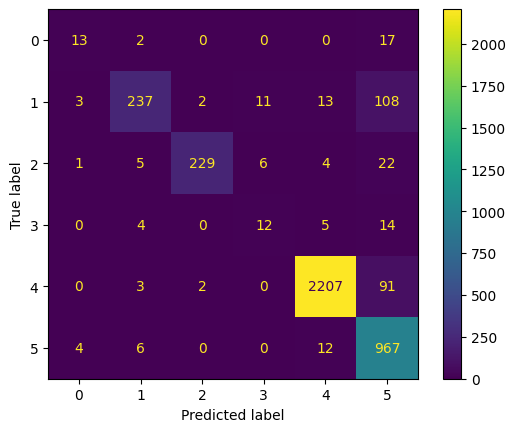

In [84]:
# Multi-layer Perceptron
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp_accuracy, mlp_report, mlp_conf_matrix = evaluate_model(mlp, X_train_split, y_train_split, X_val_split, y_val_split)
print("Multi-layer Perceptron")
print("Accuracy:", mlp_accuracy)
print("Classification Report:\n", mlp_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" mlp_conf_matrix)
accuracies.append(mlp_accuracy)

Multi-layer Perceptron

Accuracy: 0.91625 - Good Accuracy and good precision in each class.

# DecisionTreeClassifier

11. DecisionTreeClassifier

Type: Decision Tree

Use Case: Simple to interpret classification tasks.

Description: A Decision Tree splits the data into subsets based on the value of input features, creating a tree structure. The model makes decisions by navigating from the root to a leaf node, which represents a class label.

DecisionTreeClassifier
Accuracy: 0.92975
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.62      0.54        32
           1       0.78      0.78      0.78       374
           2       0.90      0.87      0.88       267
           3       0.34      0.31      0.33        35
           4       0.98      0.98      0.98      2303
           5       0.92      0.91      0.91       989

    accuracy                           0.93      4000
   macro avg       0.73      0.75      0.74      4000
weighted avg       0.93      0.93      0.93      4000



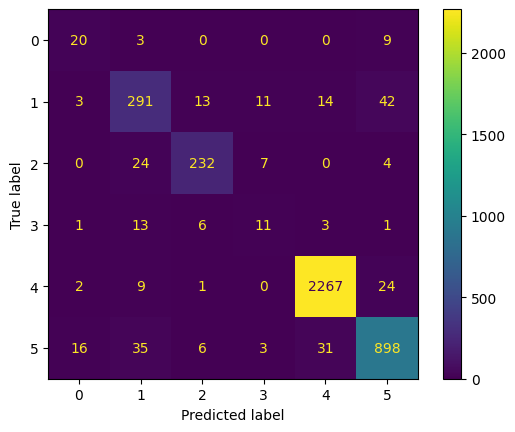

In [85]:
# DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
dtc_accuracy, dtc_report, dtc_conf_matrix = evaluate_model(dtc, X_train_split, y_train_split, X_val_split, y_val_split)
print("DecisionTreeClassifier")
print("Accuracy:", dtc_accuracy)
print("Classification Report:\n", dtc_report)
# print("Classificatiprint("Confusion Matrix:\n",on Report:\n" dtc_conf_matrix)
accuracies.append(dtc_accuracy)

DecisionTreeClassifier

Accuracy: 0.92975 - Good Precision in each class.

# CART

12. CART (Classification and Regression Trees)

Type: Decision Tree

Use Case: Both classification and regression tasks.

Description: CART is a type of decision tree that can be used for classification and regression tasks. It uses Gini impurity (for classification) or variance reduction (for regression) to make splits in the data. Essentially, CART is the algorithm underlying the DecisionTreeClassifier in scikit-learn.

CART
Accuracy: 0.92975
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.62      0.54        32
           1       0.78      0.78      0.78       374
           2       0.90      0.87      0.88       267
           3       0.34      0.31      0.33        35
           4       0.98      0.98      0.98      2303
           5       0.92      0.91      0.91       989

    accuracy                           0.93      4000
   macro avg       0.73      0.75      0.74      4000
weighted avg       0.93      0.93      0.93      4000



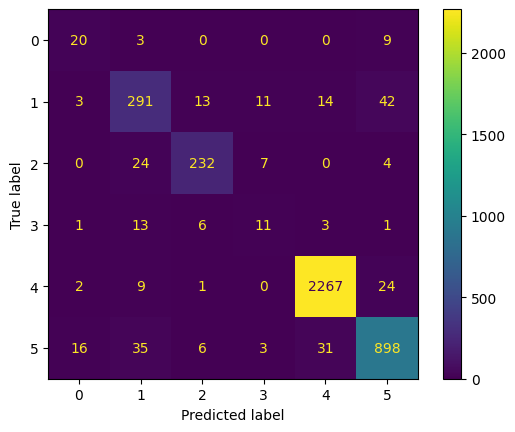

In [86]:
# CART (Classification and Regression Trees)
cart = DecisionTreeClassifier(random_state=42)
cart_accuracy, cart_report, cart_conf_matrix = evaluate_model(cart, X_train_split, y_train_split, X_val_split, y_val_split)
print("CART")
print("Accuracy:", cart_accuracy)
print("Classification Report:\n", cart_report)
accuracies.append(cart_accuracy)

CART

Accuracy: 0.92975 - Good accuracy as same as Decision Trees Classifier.

# BaggingClassifier

Bagging (short for Bootstrap Aggregating) is an ensemble machine learning technique designed to improve the stability and accuracy of models. The Bagging Classifier is a specific application of this technique for classification tasks.

DecisionTreeClassifier with BaggingClassifier
Accuracy: 0.94575
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.62      0.62        32
           1       0.81      0.83      0.82       374
           2       0.93      0.91      0.92       267
           3       0.50      0.29      0.36        35
           4       0.99      0.99      0.99      2303
           5       0.92      0.94      0.93       989

    accuracy                           0.95      4000
   macro avg       0.79      0.76      0.77      4000
weighted avg       0.94      0.95      0.94      4000

KNeighborsClassifier with BaggingClassifier
Accuracy: 0.766
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.16      0.24        32
           1       0.63      0.29      0.40       374
           2       0.65      0.53      0.59       267
           3       0.20      0.03      0.05        35
           4  

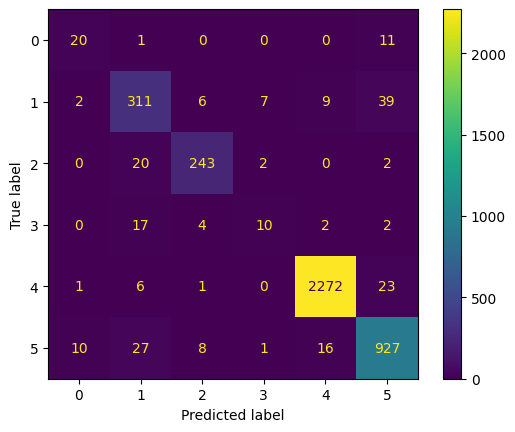

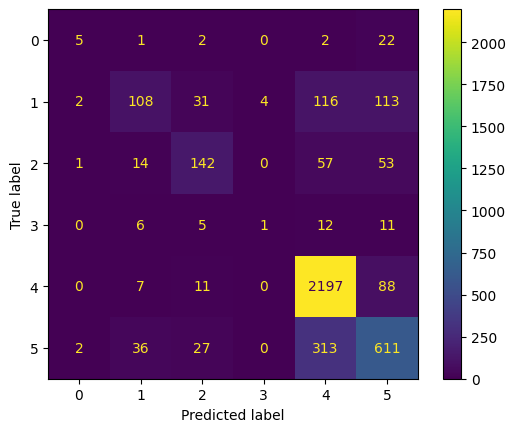

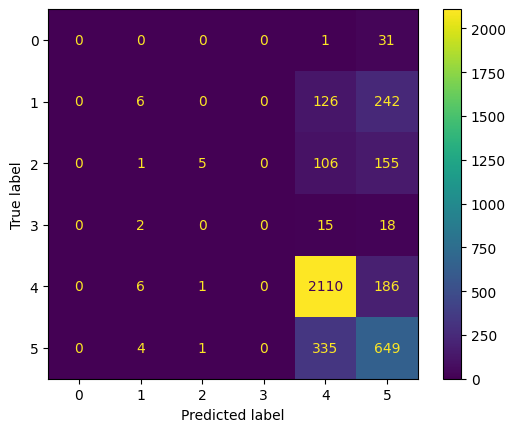

In [87]:
# BaggingClassifier

models = [DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression()]
model_names = ["DecisionTreeClassifier", "KNeighborsClassifier", "LogisticRegression"]

for model, name in zip(models, model_names):
    bag = BaggingClassifier(base_estimator=model, n_estimators=20, random_state=1729)
    bag.fit(X_train_split, y_train_split)
    accuracy, report, conf_matrix = evaluate_model(bag, X_train_split, y_train_split, X_val_split, y_val_split)
    
    print(f"{name} with BaggingClassifier")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    #print("Confusion Matrix:\n\n", conf_matrix)
    

DecisionTreeClassifier with BaggingClassifier
Accuracy: 0.94575

KNeighborsClassifier with BaggingClassifier
Accuracy: 0.766

LogisticRegression with BaggingClassifier
Accuracy: 0.6925

Comparison with Boosting:

Bagging: Focuses on reducing variance and creates each model independently.

Boosting: Focuses on reducing bias by sequentially building models, with each model focusing on the errors of the previous one.

# 7. Overall Model Comparison

A overall Plot of Accuracies of all the observed model to view the comparison and to choose the best model.

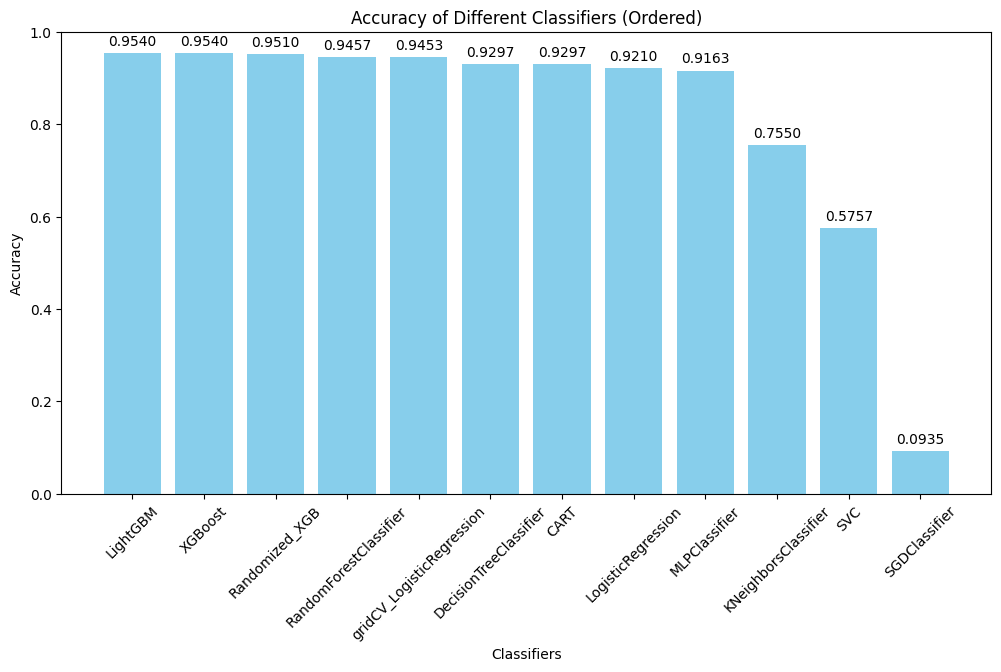

In [88]:

model_names = [
    "LogisticRegression",
    "gridCV_LogisticRegression",
    "KNeighborsClassifier",
    "RandomForestClassifier",
    "SGDClassifier",
    "SVC",
    "LightGBM",
    "XGBoost",
    "Randomized_XGB",
    "MLPClassifier",
    "DecisionTreeClassifier",
    "CART"
]


# Combine model names and accuracies into a list of tuples
models_accuracies = list(zip(model_names, accuracies))

# Sort the list of tuples based on accuracies
models_accuracies.sort(key=lambda x: x[1], reverse=True)

# Unpack the sorted list of tuples back into model names and accuracies
sorted_model_names, sorted_accuracies = zip(*models_accuracies)

# Plotting ordered accuracies
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_model_names, sorted_accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers (Ordered)')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add accuracy values on top of the bars with four decimal points
for bar, accuracy in zip(bars, sorted_accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()


- LightGBM, XGBoost, Randomized_XGB - give a accuracy of 95%
- RandomForestClassifier, gridCV_LogisticRegression - gives a accuracy of 94%

In [89]:
models_accuracies

[('LightGBM', 0.954),
 ('XGBoost', 0.954),
 ('Randomized_XGB', 0.951),
 ('RandomForestClassifier', 0.94575),
 ('gridCV_LogisticRegression', 0.94525),
 ('DecisionTreeClassifier', 0.92975),
 ('CART', 0.92975),
 ('LogisticRegression', 0.921),
 ('MLPClassifier', 0.91625),
 ('KNeighborsClassifier', 0.755),
 ('SVC', 0.57575),
 ('SGDClassifier', 0.0935)]

#  8. SUBMISSION

In [90]:
sample.head()

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN


In [91]:
processed_test.shape

(5000, 250)

In [92]:
y_pred = lgbm.predict(processed_test)

y_pred_categorical = label_encoder.inverse_transform(y_pred)

print(y_pred_categorical)
print(y_pred_categorical.shape)

['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes' ...
 'Violent Crimes' 'Violent Crimes' 'Property Crimes']
(5000,)


In [93]:
submission = pd.DataFrame({'Crime_Category' : y_pred_categorical},index = range(1,len(y_pred)+1))

submission.index.name = 'ID'

submission.to_csv('submission.csv')

In [94]:
submission.head()

,Crime_Category
ID,
1,Violent Crimes
2,Property Crimes
3,Fraud and White-Collar Crimes
4,Property Crimes
5,Crimes against Public Order


In [95]:
submission.tail()

,Crime_Category
ID,
4996,Property Crimes
4997,Property Crimes
4998,Violent Crimes
4999,Violent Crimes
5000,Property Crimes


In [96]:
submission.nunique()

Crime_Category    6
dtype: int64

In [97]:
sub = pd.read_csv("/kaggle/working/submission.csv")

In [98]:
sub.head()

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Crimes against Public Order
